<a href="https://colab.research.google.com/github/EdoPassa/Data_Science_Project_ITS_TTF_2022-23/blob/main/Data%20Mining/dsProject/Data_Mining_Milano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

In [54]:
pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
#Import Statment
import mysql.connector as connection
import numpy as np
import pandas as pd



## Import tables from MySQL to pandas' dataframes

In [56]:
mydb = connection.connect(host='ttfprojectdb.cdjjwxlk5ujc.eu-central-1.rds.amazonaws.com',
                        database='database-data-science-project-its-ttf-2022-23',
                        user='edoardo',
                        password='PG8Io90EcKBVEg2iKLgi')
query_fermate = "Select * from fermate_metro_milano;"
df_fermate_milano = pd.read_sql(query_fermate,mydb)

query_ferrovie = "Select * from ferrovie_milano"
df_ferrovie_milano = pd.read_sql(query_ferrovie,mydb)

query_mezzi_urbani = "Select * from mezzi_urbani"
df_mezzi_urbani = pd.read_sql(query_mezzi_urbani,mydb)

query_percorsi_metro = "Select * from percorsi_metro_milano"
df_percorsi_metro_milano = pd.read_sql(query_percorsi_metro,mydb)

query_stazioni_bikemi = "Select * from stazioni_bikemi"
df_bikemi = pd.read_sql(query_stazioni_bikemi,mydb)

query_sosta_bike = "Select * from sosta_bike"
df_sosta_bike = pd.read_sql(query_sosta_bike,mydb)

query_parcheggi_pub = "Select * from parcheggi_pubblici"
df_parcheggi_pub = pd.read_sql(query_parcheggi_pub,mydb)

query_parcheggi_intrscambio = "Select * from parcheggi_interscambio"
df_parcheggi_inter = pd.read_sql(query_parcheggi_intrscambio,mydb)

query_scuole_secondarie_milano = "Select * from scuole_secondarie_milano"
df_scuole_secondarie = pd.read_sql(query_scuole_secondarie_milano,mydb)

query_scuole_primarie_milano = "Select * from scuole_primarie_milano"
df_scuole_primarie = pd.read_sql(query_scuole_primarie_milano,mydb)

query_scuole_infanzia_milano = "Select * from scuole_infanzia_milano"
df_scuole_infanzia = pd.read_sql(query_scuole_infanzia_milano,mydb)

query_ospedali_milano = "select * from ospedali_milano"
df_ospedali_milano = pd.read_sql(query_ospedali_milano,mydb)

query_svago_milano = "select * from svago_milano"
df_svago_milano =  pd.read_sql(query_svago_milano,mydb)

mydb.close() #close the connection

## Cleaning and Prepping the data for the Clustering

### Hospital

In [57]:
#Filtering to get only the data for Milan
df_ospedali_milano = df_ospedali_milano[df_ospedali_milano.LOCALITA == "MILANO"]
df_ospedali_milano

,ID,DENOM_STRUTTURA,INDIRIZZO,CAP,LOCALITA
5,6,OSPEDALE S. PAOLO - MILANO,VIA A. DI RUDINI' 8,20142,MILANO
16,17,ISTITUTO ORTOPEDICO GAETANO PINI - MILANO,PIAZZA A. CARDINAL FERRARI 1,20122,MILANO
19,20,OSPEDALE L. SACCO - MILANO,VIA GIOVAN BATTISTA GRASSI 74,20157,MILANO
24,25,FONDAZ.IRCCS CA' GRANDA - OSPEDALE MAGGIORE PO...,VIA FRANCESCO SFORZA 28,20122,MILANO
44,45,"""FOND.IRCCS """"ISTIT.NAZ.LE TUMORI""""MILANO""",VIA VENEZIAN 1,20133,MILANO
49,50,OSPEDALE FATEBENEFRATELLI E OFTALMICO - MILANO,PIAZZA PRINCIPESSA CLOTILDE 3,20121,MILANO
58,59,FOND.IRCCS IST.NAZ.NEUROLOGICO C.BESTA-MILANO,VIA CELORIA 11,20133,MILANO
64,65,OSPEDALE S. CARLO BORROMEO - MILANO,VIA PIO II 3,20153,MILANO
75,76,OSPEDALE CA' GRANDA-NIGUARDA - MILANO,PIAZZA OSPEDALE MAGGIORE 3,20162,MILANO
78,79,P.O. CENTRO TRAUMATOLOGICO ORTOPEDICO - MILANO,VIA BIGNAMI 1,20126,MILANO


We need to add the lati and long to the data 

In [58]:
Ylocation = [45.434434224802374, 45.45502231363184, 45.519052444626695, 45.45899971302602, 
             45.474744262235824, 45.478247350543796, 45.47845013153815, 45.4695588314831, 
             45.51041400570228, 45.525862594524824, 45.491441001265905, 45.466274466033695]

Xlocation = [9.160272740334113, 9.19358879013831,  9.122691755211346, 9.1949594687018, 
             9.232133395688374, 9.190623211031243, 9.23031347608294, 9.11421265520928, 
             9.187337988230386, 9.214076602544718, 9.167446384259028, 9.219088797537811]

In [59]:
df_ospedali_milano['Xlocation'] = Xlocation
df_ospedali_milano['Ylocation'] = Ylocation
df_ospedali_milano_mod = df_ospedali_milano.drop(['ID','LOCALITA', 'CAP', 'DENOM_STRUTTURA', 'INDIRIZZO'], axis=1)

<ipython-input-59-04277a1d01d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ospedali_milano['Xlocation'] = Xlocation
<ipython-input-59-04277a1d01d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ospedali_milano['Ylocation'] = Ylocation


Now we prep the data for the clustering

In [60]:
df_ospedali_milano_mod['Type'] = 'Ospedale'

In [61]:
df_ospedali_milano_mod

,Xlocation,Ylocation,Type
5,9.160273,45.434434,Ospedale
16,9.193589,45.455022,Ospedale
19,9.122692,45.519052,Ospedale
24,9.194959,45.459000,Ospedale
44,9.232133,45.474744,Ospedale
49,9.190623,45.478247,Ospedale
58,9.230313,45.478450,Ospedale
64,9.114213,45.469559,Ospedale
75,9.187338,45.510414,Ospedale
78,9.214077,45.525863,Ospedale


### Subway stations

In [62]:
df_fermate_milano_mod = df_fermate_milano.drop(['id_amat','nome'], axis=1)

In [63]:
df_fermate_milano_mod = df_fermate_milano_mod.rename(columns={'LONG_X_4326': 'Xlocation', 'LAT_Y_4326': 'Ylocation'})

In [64]:
df_fermate_milano_mod['Type'] = 'Fermate_Metro'

### Railway Stations

In [65]:
df_ferrovie_milano_mod = df_ferrovie_milano.drop(['null', 'Stazione', 'ID_NIL', 'NIL', 'Location'], axis=1)

In [66]:
df_ferrovie_milano_mod = df_ferrovie_milano_mod.rename(columns={'LONG_X_4326': 'Xlocation', 'LAT_Y_4326': 'Ylocation'})

In [67]:
df_ferrovie_milano_mod['Type'] = 'Ferrovie'

In [68]:
df_ferrovie_milano_mod

,Xlocation,Ylocation,Type
0,9.17712322085963,45.4937410910517,Ferrovie
1,9.20419675790644,45.486161235226,Ferrovie
2,9.1867506782341,45.485593393828,Ferrovie
3,9.23689818170729,45.4848723299094,Ferrovie
4,9.18616229197573,45.4843344249528,Ferrovie
5,9.19868242499003,45.4804361647545,Ferrovie
6,9.20882392812955,45.4757903172868,Ferrovie
7,9.17563533371968,45.4681776130004,Ferrovie
8,9.22360963993889,45.4596197232533,Ferrovie
9,9.16924529212752,45.4531702945483,Ferrovie


### Public Transport

In [69]:
df_mezzi_urbani_mod = df_mezzi_urbani.drop(['null', 'linea', 'mezzo', 'percorso', 'Location'], axis = 1)

In [70]:
df_mezzi_urbani_mod = df_mezzi_urbani_mod.rename(columns={'LONG_X_4326_CENTROID': 'Xlocation', 'LAT_Y_4326_CENTROID': 'Ylocation'})

In [71]:
df_mezzi_urbani_mod['Type'] = df_mezzi_urbani['mezzo']

In [72]:
df_mezzi_urbani_mod

,Xlocation,Ylocation,Type
0,9.16974100864076,45.4859750999689,TRAM
1,9.16941433348214,45.4863116993079,TRAM
2,9.17865796878257,45.4741964733908,TRAM
3,9.17849012195658,45.4739436104468,TRAM
4,9.17933222505233,45.4339331905281,BUS
...,...,...,...
357,9.19091339157383,45.4375149721899,BUS
358,9.14760127811239,45.451687543387,BUS
359,9.14627481764211,45.4532172137094,BUS
360,9.20781459471915,45.4061784992761,BUS


### Bikemi Stations(bike sharing)

In [73]:
df_bikemi_mod = df_bikemi.drop(['null', 'numero', 'nome', 'Location'], axis=1)

In [74]:
df_bikemi_mod = df_bikemi_mod.rename(columns={'LONG_X_4326': 'Xlocation', 'LAT_Y_4326': 'Ylocation'})

In [75]:
df_bikemi_mod['Type'] = 'Bikemi'

In [76]:
df_bikemi_mod

,Xlocation,Ylocation,Type
0,9.18914146264194,45.4647459734151,Bikemi
1,9.19725017347506,45.4662661365004,Bikemi
2,9.17566167305518,45.4680028649026,Bikemi
3,9.18197005904563,45.4722739800244,Bikemi
4,9.17641155359659,45.4631209673857,Bikemi
...,...,...,...
320,9.18965117128139,45.4621624711804,Bikemi
321,9.12625514582878,45.489537319048,Bikemi
322,9.22443406233413,45.4626385742104,Bikemi
323,9.2185021802409,45.4646127148941,Bikemi


### Bike Parcking

In [77]:
df_sosta_bike_mod = df_sosta_bike.drop(['null', 'stalli_per_manufatto', 'Location'], axis=1)

In [78]:
df_sosta_bike_mod = df_sosta_bike_mod.rename(columns={'LONG_X_4326': 'Xlocation', 'LAT_Y_4326': 'Ylocation'})

In [79]:
df_sosta_bike_mod['Type'] = 'Sosta_Bike'

In [80]:
df_sosta_bike_mod

,Xlocation,Ylocation,Type
0,9.17820648027966,45.4299105472126,Sosta_Bike
1,9.16829273293793,45.5169685144655,Sosta_Bike
2,9.08480114510265,45.4762825397617,Sosta_Bike
3,9.1567254420346,45.4822802973057,Sosta_Bike
4,9.12053839058196,45.4550596306546,Sosta_Bike
...,...,...,...
1517,9.16585551645715,45.5052976774305,Sosta_Bike
1518,9.16627579235099,45.5058429724411,Sosta_Bike
1519,9.16634057331879,45.5056823689494,Sosta_Bike
1520,9.16632570760665,45.5053234134312,Sosta_Bike


### Public car parks

In [81]:
df_parcheggi_pub_mod = df_parcheggi_pub.drop(['null', 'nome', 'n_posti', 'Location'], axis=1)

In [82]:
df_parcheggi_pub_mod = df_parcheggi_pub_mod.rename(columns={'LONG_X_4326': 'Xlocation', 'LAT_Y_4326': 'Ylocation'})

In [83]:
df_parcheggi_pub_mod['Type'] = 'Parcheggi_Pubblici'

In [84]:
df_parcheggi_pub_mod

,Xlocation,Ylocation,Type
0,9.15556763185965,45.4737699484467,Parcheggi_Pubblici
1,9.17975124561596,45.4671910081779,Parcheggi_Pubblici
2,9.20261022816454,45.4661114870698,Parcheggi_Pubblici
3,9.20540599813797,45.4725169169033,Parcheggi_Pubblici
4,9.16861306691847,45.4815445574795,Parcheggi_Pubblici
5,9.20138763309181,45.4832208181336,Parcheggi_Pubblici
6,9.19757615529708,45.4594406038423,Parcheggi_Pubblici
7,9.1459729160495,45.4855407343012,Parcheggi_Pubblici
8,9.21343749035093,45.5160220384278,Parcheggi_Pubblici
9,9.21634454051996,45.4683681578616,Parcheggi_Pubblici


### Stations parcking

In [85]:
df_parcheggi_inter_mod = df_parcheggi_inter.drop(['null', 'Nome', 'TAB1', 'Location'], axis=1)

In [86]:
df_parcheggi_inter_mod = df_parcheggi_pub_mod.rename(columns={'LONG_X_4326': 'Xlocation', 'LAT_Y_4326': 'Ylocation'})

In [87]:
df_parcheggi_inter_mod['Type'] = 'Parcheggi_Grossi'

In [88]:
df_parcheggi_inter_mod

,Xlocation,Ylocation,Type
0,9.15556763185965,45.4737699484467,Parcheggi_Grossi
1,9.17975124561596,45.4671910081779,Parcheggi_Grossi
2,9.20261022816454,45.4661114870698,Parcheggi_Grossi
3,9.20540599813797,45.4725169169033,Parcheggi_Grossi
4,9.16861306691847,45.4815445574795,Parcheggi_Grossi
5,9.20138763309181,45.4832208181336,Parcheggi_Grossi
6,9.19757615529708,45.4594406038423,Parcheggi_Grossi
7,9.1459729160495,45.4855407343012,Parcheggi_Grossi
8,9.21343749035093,45.5160220384278,Parcheggi_Grossi
9,9.21634454051996,45.4683681578616,Parcheggi_Grossi


### Secondary Schools

In [89]:
df_scuole_secondarie

,ID,TIPO,CODVIA,MUNICIPIO,ID_NIL,NIL,LONG_X_4326,LAT_Y_4326,Location
0,1,Statale,559.0,1.0,1,DUOMO,9181341281,"4,54617E+11","(45.4616707127, 9.181341281)"
1,2,Statale,1028.0,1.0,2,BRERA,"9,18878E+11","4,54795E+11","(45.4794908375, 9.18878445105)"
2,3,Statale,6231.0,1.0,7,MAGENTA - S. VITTORE,"9,17028E+11","4,54598E+11","(45.4598291005, 9.17028238923)"
3,4,Statale,3020.0,1.0,4,GUASTALLA,"9,20384E+11","4,54635E+11","(45.4635347875, 9.20384126085)"
4,5,Statale,402.0,1.0,5,PORTA VIGENTINA - PORTA LODOVICA,"9,19823E+11",45454484756,"(45.454484756, 9.19822697807)"
...,...,...,...,...,...,...,...,...,...
2287,12029,Ente privato laico,1712.0,9.0,84,PARCO NORD,"9,18219E+11","4,55172E+11","(45.5171750965, 9.18218601178)"
2288,12030,Ente privato laico,7221.0,8.0,70,GHISOLFA,91582918987,"4,54938E+11","(45.4938445458, 9.1582918987)"
2289,12031,Ente privato laico,5319.0,6.0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,"9,14545E+11","4,5441E+11","(45.4409744847, 9.14544846859)"
2290,12032,Statale,2410.0,2.0,17,ADRIANO,"9,2454E+13","4,55148E+14","(45.5148425335823, 9.2454025951119)"


In [90]:
df_scuole_secondarie_mod_0 = df_scuole_secondarie['Location'].str.split(',', expand=True)
df_scuole_secondarie_mod_x = df_scuole_secondarie_mod_0[1].str[:-1]
df_scuole_secondarie_mod_y = df_scuole_secondarie_mod_0[0].str[1:]
df_scuole_secondarie_mod = pd.DataFrame()
df_scuole_secondarie_mod['Xlocation'] = df_scuole_secondarie_mod_x
df_scuole_secondarie_mod['Ylocation'] = df_scuole_secondarie_mod_y

In [91]:
df_scuole_secondarie_mod['Type'] = 'Scuole_Secondarie'

In [92]:
df_scuole_secondarie_mod

,Xlocation,Ylocation,Type
0,9.181341281,45.4616707127,Scuole_Secondarie
1,9.18878445105,45.4794908375,Scuole_Secondarie
2,9.17028238923,45.4598291005,Scuole_Secondarie
3,9.20384126085,45.4635347875,Scuole_Secondarie
4,9.19822697807,45.454484756,Scuole_Secondarie
...,...,...,...
2287,9.18218601178,45.5171750965,Scuole_Secondarie
2288,9.1582918987,45.4938445458,Scuole_Secondarie
2289,9.14544846859,45.4409744847,Scuole_Secondarie
2290,9.2454025951119,45.5148425335823,Scuole_Secondarie


### Primary Schools

In [93]:
df_scuole_primarie

,ID,TIPO,CODVIA,MUNICIPIO,ID_NIL,NIL,LONG_X_4326,LAT_Y_4326,Location
0,1,Statale,2456.0,2.0,16,GORLA - PRECOTTO,"9,22648E+11","4,55063E+11",(45.5063408362 / 9.22648224656)
1,2,Ente privato laico,5182.0,1.0,6,PORTA TICINESE - CONCA DEL NAVIGLIO,"9,17935E+11","4,54559E+11",(45.4558715769 / 9.17935340899)
2,3,Statale,5092.0,1.0,7,MAGENTA - S. VITTORE,"9,17328E+11",45458854609,(45.458854609 / 9.17327758799)
3,4,Ente religioso,647.0,1.0,7,MAGENTA - S. VITTORE,91696323647,"4,54634E+11",(45.4634431499 / 9.1696323647)
4,5,Ente religioso,604.0,1.0,7,MAGENTA - S. VITTORE,"9,16977E+11","4,54656E+11",(45.4655815315 / 9.16977229797)
...,...,...,...,...,...,...,...,...,...
3463,10883,Statale,6315.0,7.0,56,FORZE ARMATE,"9,11795E+11","4,54714E+11",(45.4713505544 / 9.11794852426)
3464,10884,Ente privato laico,1108.0,2.0,10,STAZIONE CENTRALE - PONTE SEVESO,"9,19911E+15","4,54876E+15",(45.48757490917477 / 9.199107041386837)
3465,10885,Ente privato laico,7158.0,8.0,67,PORTELLO,"9,15355E+11",45486489268,(45.486489268 / 9.15355479206)
3466,10886,Ente privato laico,2118.0,2.0,10,STAZIONE CENTRALE - PONTE SEVESO,"9,20132E+11","4,548E+11",(45.4799613221 / 9.20131587291)


In [94]:
df_scuole_primarie_mod_0 = df_scuole_primarie['Location'].str.split('/', expand=True)
df_scuole_primarie_mod_x = df_scuole_primarie_mod_0[1].str[:-1]
df_scuole_primarie_mod_y = df_scuole_primarie_mod_0[0].str[1:]
df_scuole_primarie_mod = pd.DataFrame()
df_scuole_primarie_mod['Xlocation'] = df_scuole_primarie_mod_x
df_scuole_primarie_mod['Ylocation'] = df_scuole_primarie_mod_y

In [95]:
df_scuole_primarie_mod['Type'] = 'Scuole_Primarie'

In [96]:
df_scuole_primarie_mod

,Xlocation,Ylocation,Type
0,9.22648224656,45.5063408362,Scuole_Primarie
1,9.17935340899,45.4558715769,Scuole_Primarie
2,9.17327758799,45.458854609,Scuole_Primarie
3,9.1696323647,45.4634431499,Scuole_Primarie
4,9.16977229797,45.4655815315,Scuole_Primarie
...,...,...,...
3463,9.11794852426,45.4713505544,Scuole_Primarie
3464,9.199107041386837,45.48757490917477,Scuole_Primarie
3465,9.15355479206,45.486489268,Scuole_Primarie
3466,9.20131587291,45.4799613221,Scuole_Primarie


### Preschools

In [97]:
df_scuole_infanzia

,ID,TIPO,MUNICIPIO,ID_NIL,NIL,LONG_X_4326,LAT_Y_4326,Location
0,1,Comunale,1.0,7,MAGENTA - S. VITTORE,"9,17378E+11","4,54585E+11",(45.4585125867 / 9.17377692911)
1,2,Ente religioso,1.0,7,MAGENTA - S. VITTORE,91696323647,"4,54634E+11",(45.4634431499 / 9.1696323647)
2,3,Ente religioso,1.0,4,GUASTALLA,"9,19892E+11","4,54543E+11",(45.4542760424 / 9.19892409768)
3,4,Ente religioso,1.0,1,DUOMO,"9,1845E+11",45457846245,(45.457846245 / 9.18449821333)
4,5,Ente privato laico,1.0,6,PORTA TICINESE - CONCA DEL NAVIGLIO,"9,17935E+11","4,54559E+11",(45.4558715769 / 9.17935340899)
...,...,...,...,...,...,...,...,...
2430,2431,Ente privato laico,2.0,10,STAZIONE CENTRALE - PONTE SEVESO,"9,19911E+15","4,54876E+15",(45.48757490917477 / 9.199107041386837)
2431,2432,Ente privato laico,8.0,67,PORTELLO,"9,15355E+11",45486489268,(45.486489268 / 9.15355479206)
2432,2433,Ente privato laico,2.0,10,STAZIONE CENTRALE - PONTE SEVESO,"9,20132E+11","4,548E+11",(45.4799613221 / 9.20131587291)
2433,2434,Ente privato laico,7.0,60,STADIO - IPPODROMI,"9,1352E+11","4,54758E+11",(45.4758386991 / 9.13519994076)


In [98]:
df_scuole_infanzia_mod_0 = df_scuole_infanzia['Location'].str.split('/', expand=True)
df_scuole_infanzia_mod_x = df_scuole_infanzia_mod_0[1].str[:-1]
df_scuole_infanzia_mod_y = df_scuole_infanzia_mod_0[0].str[1:]
df_scuole_infanzia_mod = pd.DataFrame()
df_scuole_infanzia_mod['Xlocation'] = df_scuole_infanzia_mod_x
df_scuole_infanzia_mod['Ylocation'] = df_scuole_infanzia_mod_y

In [99]:
df_scuole_infanzia_mod['Type'] = 'Scuole_Infanzia'

In [100]:
df_scuole_infanzia_mod

,Xlocation,Ylocation,Type
0,9.17377692911,45.4585125867,Scuole_Infanzia
1,9.1696323647,45.4634431499,Scuole_Infanzia
2,9.19892409768,45.4542760424,Scuole_Infanzia
3,9.18449821333,45.457846245,Scuole_Infanzia
4,9.17935340899,45.4558715769,Scuole_Infanzia
...,...,...,...
2430,9.199107041386837,45.48757490917477,Scuole_Infanzia
2431,9.15355479206,45.486489268,Scuole_Infanzia
2432,9.20131587291,45.4799613221,Scuole_Infanzia
2433,9.13519994076,45.4758386991,Scuole_Infanzia


### Leisure Spots

In [101]:
df_svago_milano_mod_0 = df_svago_milano[df_svago_milano.Location != '']

In [102]:
coords = df_svago_milano_mod_0['Location'].str.split('/', expand=True)
coords

,0,1
0,45.4708538472,9.21138357925
1,45.4829332001083,9.1664781839054
2,45.4542383748,9.22436003768
3,45.5084422216,9.13367290882
4,45.5156104946,9.22577045811
...,...,...
9040,45.490423145,9.2235739354
9041,45.4449511271,9.17776302784
9042,45.4513219897,9.18739001585
9043,45.5019767316,9.18178933963


In [103]:
denom_pe = df_svago_milano_mod_0['denominazione_pe'].str.split(' ', expand=True)
denom_pe
Type_svago = denom_pe[2]

In [104]:
Type_svago.fillna('Svago', inplace=True)
Type_svago = Type_svago.str.replace(',','')
Type_svago.value_counts()

Svago         3945
Bar           1970
Ristorante    1902
Tavole         258
Pizzerie       232
Wine           186
Disco            7
Discoteche       2
Name: 2, dtype: int64

In [105]:
df_svago_milano_mod = pd.DataFrame()
df_svago_milano_mod['Xlocation'] = coords[1]
df_svago_milano_mod['Ylocation'] = coords[0]
df_svago_milano_mod['Type'] = Type_svago
df_svago_milano_mod

,Xlocation,Ylocation,Type
0,9.21138357925,45.4708538472,Bar
1,9.1664781839054,45.4829332001083,Bar
2,9.22436003768,45.4542383748,Ristorante
3,9.13367290882,45.5084422216,Bar
4,9.22577045811,45.5156104946,Ristorante
...,...,...,...
9040,9.2235739354,45.490423145,Svago
9041,9.17776302784,45.4449511271,Ristorante
9042,9.18739001585,45.4513219897,Ristorante
9043,9.18178933963,45.5019767316,Wine


## Appending all the dataframes into one

In [108]:
df_milano = df_ospedali_milano_mod.append(df_fermate_milano_mod)

In [109]:
df_milano = df_milano.append(df_ferrovie_milano_mod)
df_milano = df_milano.append(df_mezzi_urbani_mod)
df_milano = df_milano.append(df_bikemi_mod)
df_milano = df_milano.append(df_sosta_bike_mod)
df_milano = df_milano.append(df_parcheggi_pub_mod)
df_milano = df_milano.append(df_parcheggi_inter_mod)
df_milano = df_milano.append(df_scuole_secondarie_mod)
df_milano = df_milano.append(df_scuole_primarie_mod)
df_milano = df_milano.append(df_scuole_infanzia_mod)
df_milano = df_milano.append(df_svago_milano_mod)

In [110]:
df_milano

,Xlocation,Ylocation,Type
5,9.160273,45.434434,Ospedale
16,9.193589,45.455022,Ospedale
19,9.122692,45.519052,Ospedale
24,9.194959,45.459,Ospedale
44,9.232133,45.474744,Ospedale
...,...,...,...
9040,9.2235739354,45.490423145,Svago
9041,9.17776302784,45.4449511271,Ristorante
9042,9.18739001585,45.4513219897,Ristorante
9043,9.18178933963,45.5019767316,Wine


## Encoding

In [114]:
df_milano = df_milano[df_milano.Xlocation != '']

In [115]:
df_milano['Xlocation'] = df_milano['Xlocation'].astype(float)
df_milano['Ylocation'] = df_milano['Ylocation'].astype(float)

In [117]:
df_milano_encoded = pd.get_dummies(df_milano, columns = ['Type'])
df_milano_encoded

,Xlocation,Ylocation,Type_BUS,Type_Bar,Type_Bikemi,Type_Disco,Type_Discoteche,Type_FILOBUS,Type_Fermate_Metro,Type_Ferrovie,...,Type_Pizzerie,Type_Ristorante,Type_Scuole_Infanzia,Type_Scuole_Primarie,Type_Scuole_Secondarie,Type_Sosta_Bike,Type_Svago,Type_TRAM,Type_Tavole,Type_Wine
5,9.160273,45.434434,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,9.193589,45.455022,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,9.122692,45.519052,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,9.194959,45.459000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,9.232133,45.474744,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9040,9.223574,45.490423,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9041,9.177763,45.444951,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9042,9.187390,45.451322,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9043,9.181789,45.501977,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Data Modelling: Hierachical clustering

In [123]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

## Elbow method to decide on the number of clusters

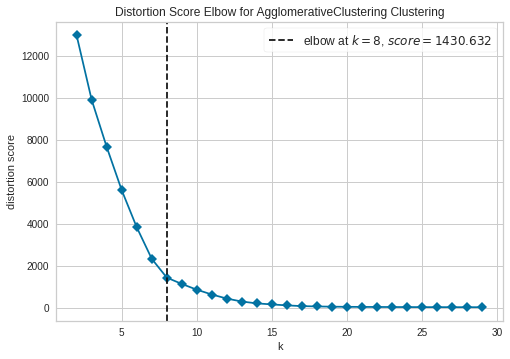

In [125]:

model = AgglomerativeClustering()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), timings=False)
# Fit data to visualizer
visualizer.fit(df_milano_encoded)
# Finalize and render figure
visualizer.show()

## Making Predictions

In [126]:
# Hierachical clustering model
hc = AgglomerativeClustering(n_clusters = 8)
# Fit and predict on the data
y_hc = hc.fit_predict(df_milano_encoded)
# Save the predictions as a column
df_milano['Cluster'] = y_hc
# Check the distribution
df_milano['Cluster'].value_counts()

3    3945
2    3436
1    2403
4    2256
5    1970
6    1902
0    1624
7    1513
Name: cluster, dtype: int64